/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)



Preselection

(3000, 2048)
-
1768
0.5893333333333334
-
-
910
0.5144245249537184
-
-
614
0.655982905982906
-
-
528
0.7437006841641041
-
-
471
0.7224735410589213
-
-
408
0.6811557788944724
-
-
342
0.6404494382022472
-
-
281
0.6017231872070582
-
-
237
0.5738918861737016
-
-
181
0.4959129295940026
-
Object selection: knn

Dfmf

Parameters

10 10 4 8


auc: 0.7092390227940101

rmse: 1.089923858110834


-----



auc: 0.7092390227940101

Preselection

(3000, 2048)
-
1768
0.5893333333333334
-
-
910
0.5144245249537184
-
-
614
0.655982905982906
-
-
528
0.7437006841641041
-
-
471
0.7224735410589213
-
-
408
0.6811557788944724
-
-
342
0.6404494382022472
-
-
281
0.6017231872070582
-
-
237
0.5738918861737016
-
-
181
0.4959129295940026
-
Object selection: knn

Dfmf

Parameters

10 10 4 8


auc: 0.6951025305973477

rmse: 1.122992085161761


-----



auc: 0.6951025305973477

Preselection

(3000, 2048)
-
1768
0.5893333333333334
-
-
910
0.5144245249537184
-
-
614
0.655982905982906
-
-
528
0.7437006841641

/Users/tinaavbelj/Mag/tourism-recommender-system/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


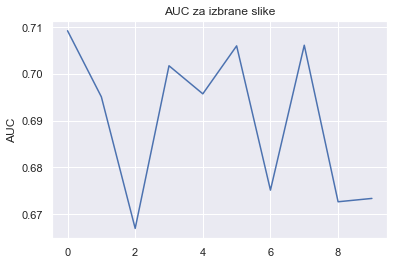

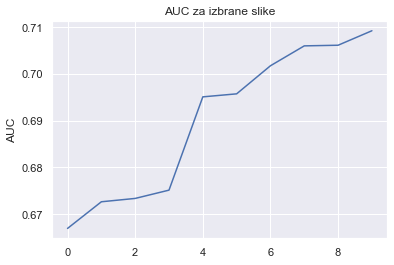

In [1]:
import os
import sys
parent_dir = os.path.split(os.getcwd())[0]
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import random
import pickle

from utils import get_features, save_scores
from object_selection import ObjectSelection
from load_data import load_data
import matplotlib.pyplot as plt

# Parameters
data_directory = '../../data/generated-data-r-2-n-6-4/'
features_path = '../../data/features-generated-data-r-2-n-6-4'
booking_file = '../../data/booking.csv'
users_file = '../../data/user.csv'
rating_thresholds = [1, 7]
true_objects_indexes = [0, 1, 2, 3, 4, 5]
false_objects_indexes = [6, 7, 8, 9]

file_names = os.listdir(data_directory)
img_ids_vector = [int(name.split('-')[0]) for name in file_names]
ratings_vector = [int(name.split('-')[-2]) for name in file_names]
name_vector = [data_directory + name for name in file_names]
images_indexes = [name.split('-')[3].split('.')[0] for name in file_names]

ratings_matrix, images_indexes_for_id, ids_indexes, users_matrix = load_data(data_directory, booking_file,
                                                                             users_file, rating_thresholds, binary=True)

features = get_features(features_path, name_vector)

# K Nearest Neighbors
cv_results_file = '../results/cv-generated-data-r-2-n-6-4-knn.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='knn')
    #selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix, users=users_matrix, cv_results_file=cv_results_file)
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector)
    selection.evaluate(evaluation_metric='auc')
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-6-4-knn.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

Parameters

12 12 8 8


rmse: 1.201964799021349


-----



auc: 0.6418873971940009
Object selection: random

Dfmf

Parameters

12 12 8 8


rmse: 1.1850703524626123


-----



auc: 0.6648979350733737
Object selection: random

Dfmf

Parameters

12 12 8 8


rmse: 1.1838603420732206


-----



auc: 0.6734398121122439
Object selection: random

Dfmf

Parameters

12 12 8 8


rmse: 1.1933404503748897


-----



auc: 0.6727322469659112
Object selection: random

Dfmf

Parameters

12 12 8 8


rmse: 1.1819340563144096


-----



auc: 0.6828029812592334
Object selection: random

Dfmf

Parameters

12 12 8 8


rmse: 1.2018952039748514


-----



auc: 0.6554080125141218
Object selection: random

Dfmf

Parameters

12 12 8 8


rmse: 1.1933998402492627


-----



auc: 0.6900833131117043
Object selection: random

Dfmf

Parameters

12 12 8 8


rmse: 1.2005259639024601


-----



auc: 0.6607214901891194
Object selection: random

Dfmf

Parameters

12 12 8 8


rmse: 1.171379776

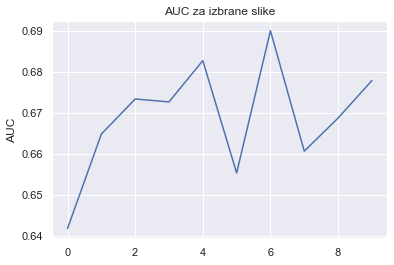

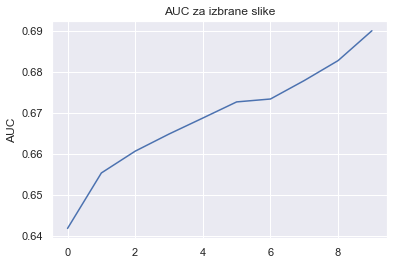

In [2]:
# Random selection
cv_results_file = '../results/cv-generated-data-r-2-n-6-4-random.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-6-4-random.csv'
save_scores(scores, results_file)


Preselection

(3000, 2048)
-
1747
0.5823333333333333
-
-
886
0.5065751858204689
-
-
628
0.6848494589092468
-
-
576
0.7763375560489312
-
-
539
0.7667454688731284
-
-
503
0.7508207879564383
-
-
494
0.7694704049844235
-
-
471
0.7536805299963195
-
-
451
0.7430863776032776
-
-
436
0.7390793881004178
-
Object selection: rf

Dfmf

Parameters

10 10 4 8


rmse: 1.1615515803843344


-----



auc: 0.6758497792803537

Preselection

(3000, 2048)
-
1759
0.5863333333333333
-
-
1647
0.9363338779354734
-
-
868
0.526060606060606
-
-
591
0.6581270903010034
-
-
516
0.743581131512166
-
-
479
0.7474149152443216
-
-
434
0.7091503267973857
-
-
424
0.7349057282671273
-
-
405
0.7219251336898397
-
-
393
0.7225122943354987
-
Object selection: rf

Dfmf

Parameters

10 10 4 8


rmse: 1.1142243980882958


-----



auc: 0.6964509843766811

Preselection

(3000, 2048)
-
1762
0.5873333333333334
-
-
915
0.5189894810848814
-
-
650
0.6820857224107031
-
-
591
0.7797122362339755
-
-
542
0.7602264534505786
-
-
526
0.7713373

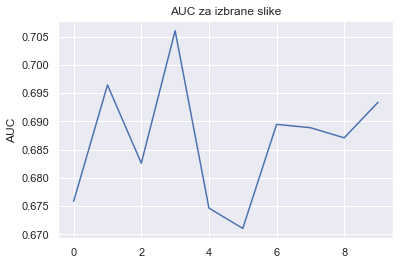

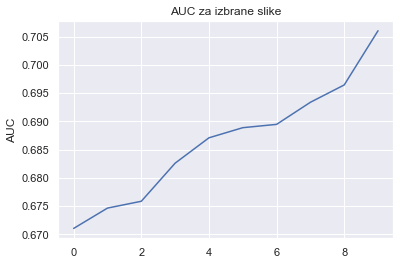

In [3]:
# Random forest
cv_results_file = '../results/cv-generated-data-r-2-n-6-4-knn.csv'
scores = []
for _ in range(10):
    selection = ObjectSelection(show_selection_results=False, selection_algorithm='rf')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                    users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                    true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                    paths=name_vector) 
    selection.evaluate(evaluation_metric='rmse')
    print('\n\n-----\n\n')
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

scores.sort()
plt.title('AUC za izbrane slike')
plt.plot(scores)
plt.ylabel('AUC')
plt.show()

results_file = '../scores/generated-data-r-2-n-6-4-rf.csv'
save_scores(scores, results_file)

In [4]:
from basic_factorization import BasicFactorization


cv_results_file = '../results/cv-generated-data-r-2-n-6-4-knn.csv'
scores = []
for _ in range(10):
    selection = BasicFactorization(show_selection_results=True, selection_algorithm='random')
    selection.transform(ids=img_ids_vector, features=features, ratings=ratings_vector, users_ratings=ratings_matrix,
                        users=users_matrix, cv_results_file=cv_results_file, images_indexes=images_indexes,
                        true_objects_indexes=true_objects_indexes, false_objects_indexes=false_objects_indexes,
                        paths=name_vector)
    score = selection.evaluate(evaluation_metric='auc')
    scores.append(score)
    
results_file = '../scores/generated-data-r-2-n-6-4-b.csv'
save_scores(scores, results_file)

Object selection: random

Dfmf

auc: 0.71480120632663
Object selection: random

Dfmf

auc: 0.7305358738338147
Object selection: random

Dfmf

auc: 0.7221704562718387
Object selection: random

Dfmf

auc: 0.7138381237002658
Object selection: random

Dfmf

auc: 0.7056638233750858
Object selection: random

Dfmf

auc: 0.721010966192979
Object selection: random

Dfmf

auc: 0.7272338664030886
Object selection: random

Dfmf

auc: 0.7238217271166201
Object selection: random

Dfmf

auc: 0.7236152793246219
Object selection: random

Dfmf

auc: 0.7085870868416033
